# Keras
## Sequential API

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [2]:
X_train, X_val, y_train, y_val = X_train[:55000], X_train[55000:], y_train[:55000], y_train[55000:]

X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

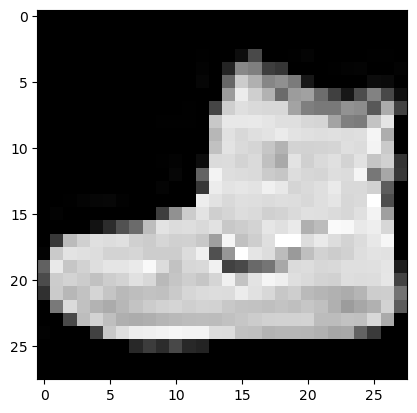

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.show()

In [4]:
tf.random.set_seed(20)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5056 - accuracy: 0.8217 - val_loss: 0.3936 - val_accuracy: 0.8502
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3700 - accuracy: 0.8650 - val_loss: 0.3668 - val_accuracy: 0.8622
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3376 - accuracy: 0.8763 - val_loss: 0.3630 - val_accuracy: 0.8692
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3123 - accuracy: 0.8859 - val_loss: 0.3485 - val_accuracy: 0.8718
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2960 - accuracy: 0.8910 - val_loss: 0.3422 - val_accuracy: 0.8776
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2829 - accuracy: 0.8952 - val_loss: 0.3533 - val_accuracy: 0.8712
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2685 - accuracy: 0.8999 - val_loss: 0.3282 - val_accuracy:

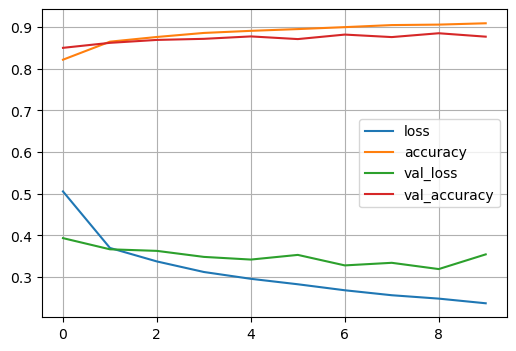

In [8]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.grid(True)
plt.show()

In [9]:
results = model.evaluate(X_test, y_test)
print(r'Loss: {:.2f}, Accuracy: {:.2f}'.format(results[0], results[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.8730
Loss: 0.36, Accuracy: 0.87


In [10]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

print(y_pred[0])

9


## Sequential API for Regression

In [1]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cali_housing = fetch_california_housing()

X, y = cali_housing.data, cali_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=20)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train.shape, X_val.shape, X_test.shape

((13209, 8), (3303, 8), (4128, 8))

In [2]:
def create_model():
    tf.random.set_seed(20)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    return model

### Define the model via Subcalssing API

In [ ]:
# class RegressModel(tf.keras.Model):
#     def __init__(self):
#         super().__init__()
#         self.dense1 = tf.keras.layers.Dense(64, activation='relu')
#         self.dense2 = tf.keras.layers.Dense(32, activation='relu')
#         self.dense3 = tf.keras.layers.Dense(32, activation='relu')
#         self.dense4 = tf.keras.layers.Dense(1)

#     def call(self, inputs, training=False):
#         x = self.dense1(inputs)
#         x = self.dense2(x)
#         x = self.dense3(x)
#         return self.dense4(x)

In [3]:
model = create_model()
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [4]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
413/413 [==============================] - 2s 2ms/step - loss: 0.9942 - mae: 0.6694 - val_loss: 0.3993 - val_mae: 0.4571
Epoch 2/10
413/413 [==============================] - 1s 2ms/step - loss: 0.3996 - mae: 0.4533 - val_loss: 0.3523 - val_mae: 0.4330
Epoch 3/10
413/413 [==============================] - 1s 2ms/step - loss: 0.3701 - mae: 0.4338 - val_loss: 0.3555 - val_mae: 0.4429
Epoch 4/10
413/413 [==============================] - 1s 2ms/step - loss: 0.3531 - mae: 0.4211 - val_loss: 0.3223 - val_mae: 0.4001
Epoch 5/10
413/413 [==============================] - 1s 1ms/step - loss: 0.3416 - mae: 0.4138 - val_loss: 0.3217 - val_mae: 0.4082
Epoch 6/10
413/413 [==============================] - 1s 1ms/step - loss: 0.3303 - mae: 0.4041 - val_loss: 0.3030 - val_mae: 0.3947
Epoch 7/10
413/413 [==============================] - 1s 2ms/step - loss: 0.3236 - mae: 0.3990 - val_loss: 0.2949 - val_mae: 0.3805
Epoch 8/10
413/413 [==============================] - 1s 1ms/step - loss: 0.

In [5]:
mse, mae = model.evaluate(X_test, y_test)
print(r'Test MSE: {:.2f}, Test MAE: {:.2f}'.format(mse, mae))

129/129 [==============================] - 0s 1ms/step - loss: 0.3132 - mae: 0.3802
Test MSE: 0.31, Test MAE: 0.38


In [6]:
y_pred = model.predict(X_test)
print(y_pred[:5].ravel())
print(y_test[:5])

[1.4889662 2.443582  1.473622  2.1863635 2.2531116]
[1.176 2.922 1.313 2.659 2.102]


### Callbacks

In [7]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = create_model()

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

checkpoint = ModelCheckpoint('model.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

# history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, callbacks=[checkpoint, early_stopping])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[checkpoint, early_stopping])

# manually save the model after training
# model.save('model.h5')

Epoch 1/20
413/413 [==============================] - 1s 2ms/step - loss: 0.9942 - mae: 0.6694 - val_loss: 0.3991 - val_mae: 0.4571

Epoch 00001: val_loss improved from inf to 0.39912, saving model to model.h5
Epoch 2/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3997 - mae: 0.4534 - val_loss: 0.3523 - val_mae: 0.4326

Epoch 00002: val_loss improved from 0.39912 to 0.35225, saving model to model.h5
Epoch 3/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3696 - mae: 0.4338 - val_loss: 0.3557 - val_mae: 0.4437

Epoch 00003: val_loss did not improve from 0.35225
Epoch 4/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3516 - mae: 0.4207 - val_loss: 0.3220 - val_mae: 0.4001

Epoch 00004: val_loss improved from 0.35225 to 0.32197, saving model to model.h5
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3410 - mae: 0.4135 - val_loss: 0.3223 - val_mae: 0.4096

Epoch 00005: val_loss did not improve from 0.

In [8]:
model = tf.keras.models.load_model('model.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 3,745
Trainable params: 3,745
Non-trainable params: 0
_________________________________________________________________


In [9]:
mse, mae = model.evaluate(X_test, y_test)
print(r'Test MSE: {:.2f}, Test MAE: {:.2f}'.format(mse, mae))

129/129 [==============================] - 0s 1ms/step - loss: 0.3059 - mae: 0.3806
Test MSE: 0.31, Test MAE: 0.38


In [10]:
model.save_weights('model_weights.h5')

In [11]:
model.load_weights('model_weights.h5')

In [12]:
y_pred = model.predict(X_test)
print(y_pred[:5].ravel())
print(y_test[:5])

[1.369338  2.586187  1.5943354 2.1087496 2.2451963]
[1.176 2.922 1.313 2.659 2.102]


### Vanishing/Exploding Gradients

In [ ]:
# LeakyReLU with He initialization

model = tf.keras.models.Sequential([
    # ...
    tf.keras.layers.Dense(32, kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(),
    # ...
    ])

In [ ]:
# adding batch normalization before activation function in hidden layer

model = tf.keras.models.Sequential([
    # ...
    model.add(tf.keras.layers.Dense(64, activation='relu')),
    tf.keras.layers.BatchNormalization(),
    # ...
])

In [ ]:
# Gradient Clipping can be used to prevent exploding gradients in RNNs

optimizer = tf.keras.optimizers.Adam(clipvalue=1.0)
model.compile(optimizer=optimizer, loss='mean_squared_error')

### Overfitting

In [ ]:
# L1 and L2 regularization
# L1 regularization results in sparse models, where some feature weights are zero
# L2 regularization results in more balanced models

model = tf.keras.models.Sequential([
    # ...
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    # ...
])

In [ ]:
# Dropout randomly sets a fraction of input units to 0 at each update during training

model = tf.keras.models.Sequential([
    # ...
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    # ...
])

### Learning Rate Decay

$$
lr_t = lr_{start} * decay^{(\frac{t}{decay\_steps})}
$$

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.1,
    decay_steps=100000,
    decay_rate=0.8,
    staircase=False)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

## ConvNet

In [1]:
import tensorflow as tf
from functools import partial

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train, X_test = X_train / 255.0, X_test / 255.0

Conv2D = partial(tf.keras.layers.Conv2D, kernel_size=(3, 3), activation='relu')
MaxPooling2D = partial(tf.keras.layers.MaxPooling2D, pool_size=(2, 2))
Dropout = partial(tf.keras.layers.Dropout, rate=0.25)

model = tf.keras.models.Sequential([
    Conv2D(filters=32, input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Dropout(),
    Conv2D(filters=64),
    MaxPooling2D(),
    Dropout(),
    Conv2D(filters=64),
    Dropout(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_split=0.2,
    callbacks=[early_stopping]
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.2f}')
print(f'Test accuracy: {accuracy:.2f}')

Epoch 1/20
1500/1500 [==============================] - 7s 2ms/step - loss: 0.7790 - accuracy: 0.7115 - val_loss: 0.4570 - val_accuracy: 0.8273
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5147 - accuracy: 0.8145 - val_loss: 0.3821 - val_accuracy: 0.8555
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4450 - accuracy: 0.8409 - val_loss: 0.3438 - val_accuracy: 0.8723
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4050 - accuracy: 0.8565 - val_loss: 0.3090 - val_accuracy: 0.8820
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3774 - accuracy: 0.8672 - val_loss: 0.2987 - val_accuracy: 0.8860
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3607 - accuracy: 0.8716 - val_loss: 0.2833 - val_accuracy: 0.8969
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3480 - accuracy: 0.8750 - val_loss: 0.2747 - val_accuracy:

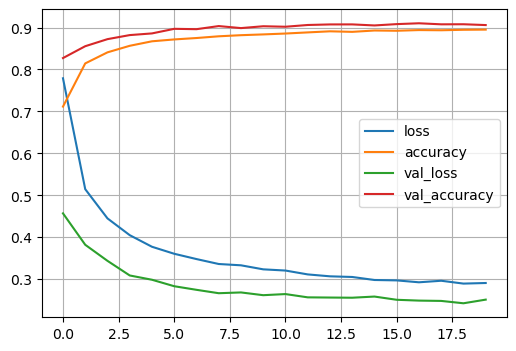

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.grid(True)
plt.show()